In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [ ]:
checkpoints = r'C:\Users\Talha Ali\Desktop\machine learning labs\lab13\\E1-cp-{epoch:04d}-loss{val_loss:.2f}.h5'

In [ ]:
train_dir = r'C:\Users\Talha Ali\Desktop\machine learning labs\LAB 11\dataset\train'
validation_dir = r'C:\Users\Talha Ali\Desktop\machine learning labs\LAB 11\dataset\validation'
test_dir = r'C:\Users\Talha Ali\Desktop\machine learning labs\LAB 11\dataset\test'

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='sigmoid'))

C:\Users\PMLS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,088,452 (49.93 MB)

 Trainable params: 13,088,452 (49.93 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [24]:
train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size=(256, 256),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
                                                        validation_dir,
                                                        target_size=(256, 256),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


In [26]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(256, 256), batch_size=32,class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(256, 256),batch_size=32,class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


In [28]:
EpochCheckpoint = ModelCheckpoint(checkpoints,
                             monitor="val_loss",
                             save_best_only=True, 
                             verbose=1)
callbacks = [EpochCheckpoint]

In [32]:
model_history = model.fit(train_generator,
                         validation_data =validation_generator,
                         steps_per_epoch=train_generator.n//train_generator.batch_size,
                         validation_steps = validation_generator.n//validation_generator.batch_size,
                         epochs = 5,
                         callbacks = callbacks)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.4092 - loss: 1.2307
Epoch 1: val_loss improved from inf to 0.73321, saving model to C:\Users\PMLS\ml\lab13\\E1-cp-0001-loss0.73.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 161s 3s/step - acc: 0.4113 - loss: 1.2272 - val_acc: 0.6875 - val_loss: 0.7332
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.7156 - loss: 0.6452
Epoch 2: val_loss did not improve from 0.73321
50/50 ━━━━━━━━━━━━━━━━━━━━ 131s 3s/step - acc: 0.7161 - loss: 0.6442 - val_acc: 0.6339 - val_loss: 0.7951
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.8027 - loss: 0.4724
Epoch 3: val_loss improved from 0.73321 to 0.35575, saving model to C:\Users\PMLS\ml\lab13\\E1-cp-0003-loss0.36.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 133s 3s/step - acc: 0.8029 - loss: 0.4719 - val_acc: 0.8393 - val_loss: 0.3557
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.8368 - loss: 0.3631
Epoch 4: val_loss did not improve from 0.35575
50/50 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - acc: 0.8367 - loss: 0.3631 - val_acc: 0.8080 - val_loss: 0.4518
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.8536 - loss: 0.3335
Epoch 5: val_loss improved from 0.35575 to 0.33277, saving model to C:\Users\PMLS\ml\lab13\\E1-cp-0005-loss0.33.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - acc: 0.8537 - loss: 0.3333 - val_acc: 0.8348 - val_loss: 0.3328


In [34]:
model_history.history

{'acc': [0.515625,
  0.7393749952316284,
  0.8149999976158142,
  0.8356249928474426,
  0.856249988079071],
 'loss': [1.0520470142364502,
  0.5930988192558289,
  0.44709911942481995,
  0.3644254803657532,
  0.3225455582141876],
 'val_acc': [0.6875,
  0.6339285969734192,
  0.8392857313156128,
  0.8080357313156128,
  0.8348214030265808],
 'val_loss': [0.7332075834274292,
  0.7950813174247742,
  0.35574832558631897,
  0.451840341091156,
  0.33276575803756714]}

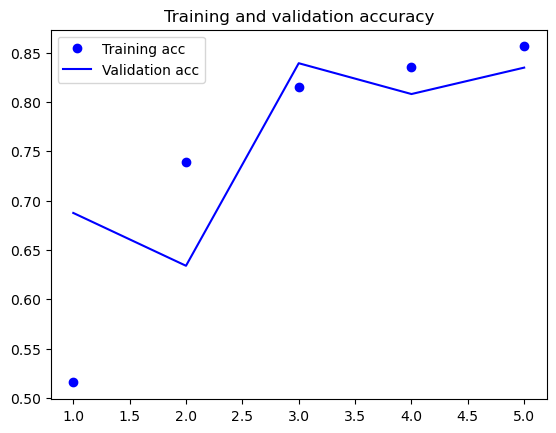

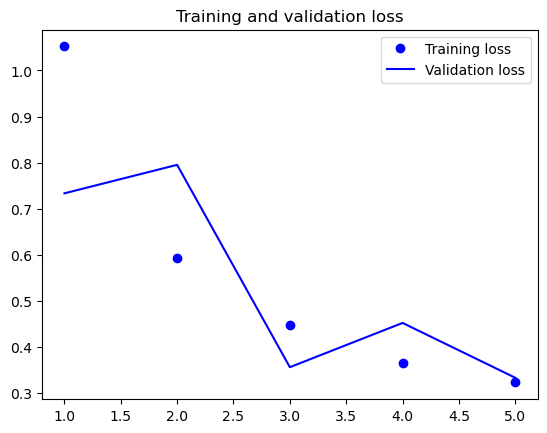

<Figure size 640x480 with 0 Axes>

In [36]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.savefig(r'C:\Users\PMLS\ml\lab13\model_Accuracy.png')

Found 200 images belonging to 4 classes.
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 235ms/step


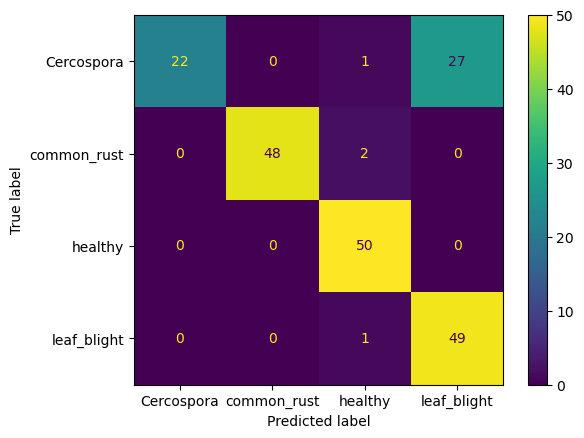

In [ ]:
model = load_model(r'C:\Users\Talha Ali\Desktop\machine learning labs\lab13\E1-cp-0005-loss0.33.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(256, 256), batch_size=32, shuffle=False, class_mode='categorical')
label=test_generator.labels
preds=model.predict(test_generator)
pred = np.argmax(preds, axis = 1)
cm = confusion_matrix(label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['Cercospora', 'common_rust','healthy', 'leaf_blight'])
disp.plot()
plt.show()
#plt.savefig(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\confusion_matrics.jpg')

In [40]:
print(classification_report(label, pred, target_names=['Cercospora', 'common_rust','healthy', 'leaf_blight']))

              precision    recall  f1-score   support

  Cercospora       1.00      0.44      0.61        50
 common_rust       1.00      0.96      0.98        50
     healthy       0.93      1.00      0.96        50
 leaf_blight       0.64      0.98      0.78        50

    accuracy                           0.84       200
   macro avg       0.89      0.84      0.83       200
weighted avg       0.89      0.84      0.83       200

